<a href="https://colab.research.google.com/github/gtgindia/Google-Colab-ML/blob/master/Backtesting_PE_based_strategy_from_scratch_using%C2%A0Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
prices = pd.read_csv("/content/sample_data/Nifty_PE_Gold.csv",
           parse_dates=True, infer_datetime_format=True, keep_date_col=True,index_col="Date")

#Backtesting on PE based Strategy

In [ ]:
def trade(df_end,date,symbol_risky,symbol_safe,port_value,prices,in_market_proportion):
  df_end.loc[date, symbol_risky] = (in_market_proportion*port_value)/prices.loc[date, symbol_risky]
  df_end.loc[date, symbol_safe] = ((1-in_market_proportion)*port_value)/prices.loc[date, symbol_safe]

In [ ]:
def backtest_strategy(prices, symbol_risky,symbol_safe, symbol_PE):
 
 
    df_init   = (prices[symbol_risky]*0).to_frame()
    df_end    = (prices[symbol_risky]*0).to_frame()

    df_init[symbol_safe]   = 0
    df_end[symbol_safe]    = 0
 
    df_init.iloc[0, df_init.columns.get_loc(symbol_safe)] = 100
    df_end.iloc[0, df_end.columns.get_loc(symbol_safe)]   = 100
 
    calendar = pd.Series(prices.index).iloc[1:]
    buy = False
    switch_count = 0
 
 
    for date in calendar:
        prev_date = df_init.index[df_init.index < date][-1]
 
        df_init.loc[date, :] = df_end.loc[prev_date, :]
 
        risky_value = df_init.loc[date, symbol_risky] * prices.loc[date, symbol_risky]
        safe_value = df_init.loc[date, symbol_safe] *prices.loc[date, symbol_safe]
        port_value = risky_value + safe_value
          
        if prices.loc[date, symbol_PE] < 20:
          # Market PE is low -> be in market position 
          trade(df_end,date,symbol_risky,symbol_safe,port_value,prices,1)
          if not buy:
            switch_count += 1
          buy = True
 
        elif prices.loc[date, symbol_PE] > 24:
          # Market PE is high -> be  in cash
          trade(df_end,date,symbol_risky,symbol_safe,port_value,prices,0)
          if buy:
            switch_count += 1            
          buy = False
  
        else:
          if buy: 
            # Keep in Market
            trade(df_end,date,symbol_risky,symbol_safe,port_value,prices,1)

          else:
            # Keep in Gold
            trade(df_end,date,symbol_risky,symbol_safe,port_value,prices,0)
           

 
    portval = (df_end*prices[[symbol_risky, symbol_safe]]).sum(axis = 1).to_frame().rename(columns = {0:'Strategy'})
    portval[symbol_risky] = prices[symbol_risky]
    portval[symbol_safe] = prices[symbol_safe]

    portval = portval/portval.iloc[0].values
 
    return portval,switch_count

In [ ]:
result,switches = backtest_strategy(prices = prices, symbol_risky = 'Nifty',
                                    symbol_safe = "Gold",symbol_PE = 'PE')


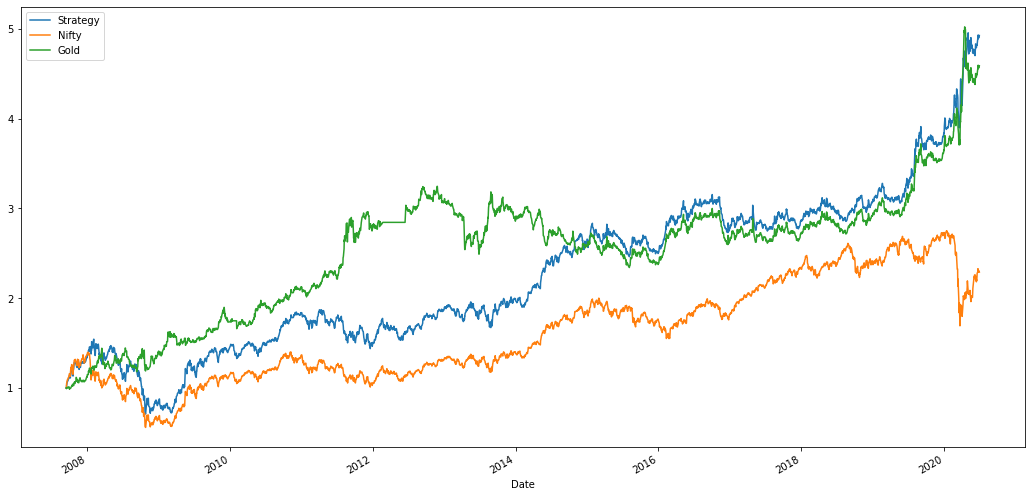

In [ ]:
result.plot(figsize = (18,9))

## Final value if you had invested Rs. 10000 in all three

In [ ]:
final_value = result.tail(1)

In [ ]:
print(f"Final value f one had invested Rs 10000 in all three ")
print(f"Stategy  :Rs. {int(final_value.Strategy.values*10000)} ")
print(f"Nifty    :Rs. {int(final_value.Nifty.values*10000)} ")
print(f"Gold     :Rs. {int(final_value.Gold.values*10000)} ")

Final value f one had invested Rs 10000 in all three 
Stategy  :Rs. 49264 
Nifty    :Rs. 22920 
Gold     :Rs. 45898 


In [ ]:
print(f"Total no of switches made : {switches}")

Total no of switches made : 8
